# Preprocessing

---
## Imports

In [101]:
import pandas as pd

from utils.duplicates import remove_rows, get_duplicates_to_delete, visualize_duplicates

In [102]:
df = pd.read_csv('../data/processed/csv/df.csv')
duplicates = pd.read_csv('../data/processed/csv/duplicates.csv')

--- 
## Remove duplicates

### Automatically delete:
- For each duplicate group, delete all but one rows marked as "Duplicate" for each "Style".
- Outputs "df_duplicates_cleaned".

In [103]:
duplicates_to_delete = get_duplicates_to_delete(duplicates)
df_duplicates_cleaned = remove_rows(df, duplicates_to_delete)
df_duplicates_cleaned

Identifying rows to delete...


100%|██████████| 5684/5684 [00:02<00:00, 2066.96it/s]

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,tables/Eclectic/4029eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
1,tables/Eclectic/4107eclectic-nightstands-and-b...,jpg,350,350,1.0,RGB,tables,Eclectic
2,tables/Eclectic/3885eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
3,tables/Eclectic/4040eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
4,tables/Eclectic/4171eclectic-coffee-tables.jpg,jpg,350,350,1.0,RGB,tables,Eclectic
...,...,...,...,...,...,...,...,...
84791,beds/Asian/3166asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian
84792,beds/Asian/7733asian-panel-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian
84793,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
84794,beds/Asian/7850asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian


### Manually delete:
- Any rows marked as "Inspect" that belongs in the wrong "Class".
- Outputs "df_inspects_cleaned"

In [104]:
inspects = duplicates[duplicates['Duplicate_Type'] == 'Inspect']
inspects

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
90,41,Inspect,tables/Craftsman/28467craftsman-dressers.jpg,jpg,350,350,1.0,RGB,tables,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
91,41,Inspect,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
153,72,Inspect,tables/Industrial/37555industrial-entertainmen...,jpg,350,350,1.0,RGB,tables,Industrial,d6aa7d5a82ad6a0068540af5ad5596af9055d02b93f41f...
154,72,Inspect,dressers/Industrial/dresser3452345.jpg,jpg,350,350,1.0,RGB,dressers,Industrial,d6aa7d5a82ad6a0068540af5ad5596af9055d02b93f41f...
205,98,Inspect,dressers/Farmhouse/34120farmhouse-buffets-and-...,jpg,350,350,1.0,RGB,dressers,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
206,98,Inspect,tables/Farmhouse/28763farmhouse-console-tables...,jpg,350,350,1.0,RGB,tables,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
227,109,Inspect,tables/Modern/10363modern-nightstands-and-beds...,jpg,350,350,1.0,RGB,tables,Modern,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...
228,109,Inspect,lamps/Contemporary/4023contemporary-table-lamp...,jpg,350,350,1.0,RGB,lamps,Contemporary,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...
235,113,Inspect,dressers/Modern/2146modern-dressers.jpg,jpg,350,350,1.0,RGB,dressers,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...
236,113,Inspect,tables/Modern/11484modern-dressers.jpg,jpg,350,350,1.0,RGB,tables,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...


In [105]:
total_inspect_groups = inspects["Group"].nunique(dropna=False)

In [106]:
inspects_rows_to_delete = [91, 154, 205, 227, 235, 277, 280, 281, 287, 290, 299, 310, 318, 323, 325]

In [107]:
inspect_review = inspects.copy()
inspect_review["Duplicate_Type"] = "Keep"
inspect_review.loc[inspects_rows_to_delete, "Duplicate_Type"] = "DELETE"

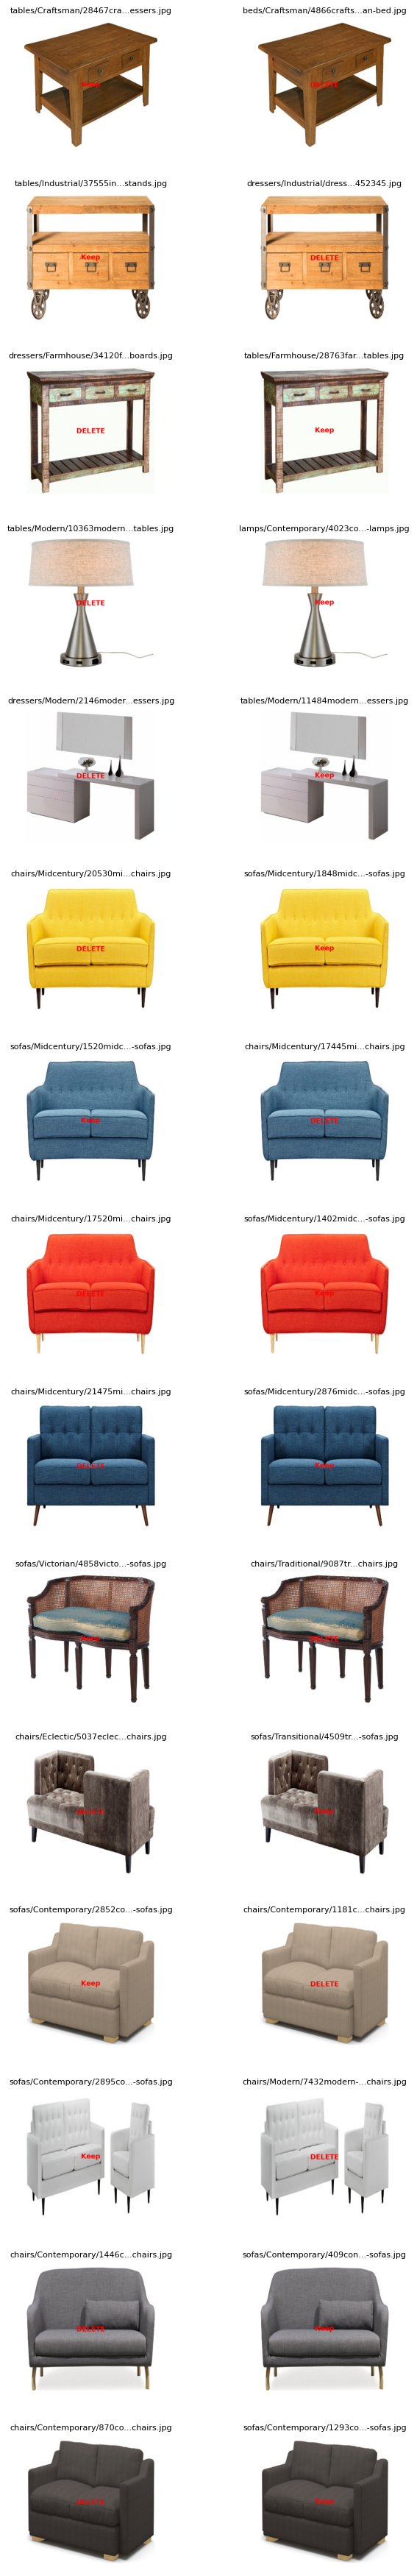

In [108]:
visualize_duplicates(inspect_review, total_inspect_groups)

In [109]:
inspects_to_delete = inspect_review[inspect_review["Duplicate_Type"] == "DELETE"]
inspects_to_delete

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
91,41,DELETE,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
154,72,DELETE,dressers/Industrial/dresser3452345.jpg,jpg,350,350,1.0,RGB,dressers,Industrial,d6aa7d5a82ad6a0068540af5ad5596af9055d02b93f41f...
205,98,DELETE,dressers/Farmhouse/34120farmhouse-buffets-and-...,jpg,350,350,1.0,RGB,dressers,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
227,109,DELETE,tables/Modern/10363modern-nightstands-and-beds...,jpg,350,350,1.0,RGB,tables,Modern,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...
235,113,DELETE,dressers/Modern/2146modern-dressers.jpg,jpg,350,350,1.0,RGB,dressers,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...
277,134,DELETE,chairs/Midcentury/20530midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,bffef807c0403f5fc156c2a83457d7e8e81785a81e8090...
280,135,DELETE,chairs/Midcentury/17445midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,baae7817f0542a5fc55a87e847abc7e8bac1d5a0c2852c...
281,136,DELETE,chairs/Midcentury/17520midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,eaaa2d56b1556aaad50297bd17fb96a04abec0559fc441...
287,139,DELETE,chairs/Midcentury/21475midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,ffff3a01a8003d5f856a95fe157e81ea8554c02aaec454...
290,140,DELETE,chairs/Traditional/9087traditional-indoor-chai...,jpg,350,350,1.0,RGB,chairs,Traditional,faba3f2bb540f09ae845da1cc0f7e03d22ff93f081e8e1...


In [110]:
df_inspects_cleaned = remove_rows(df, inspects_to_delete)
df_inspects_cleaned

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,tables/Eclectic/4029eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
1,tables/Eclectic/4107eclectic-nightstands-and-b...,jpg,350,350,1.0,RGB,tables,Eclectic
2,tables/Eclectic/3885eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
3,tables/Eclectic/4040eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
4,tables/Eclectic/4171eclectic-coffee-tables.jpg,jpg,350,350,1.0,RGB,tables,Eclectic
...,...,...,...,...,...,...,...,...
90064,beds/Asian/3166asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian
90065,beds/Asian/7733asian-panel-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian
90066,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
90067,beds/Asian/7850asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian


---
## Split (train, validation, test)

---
## Rescaling

---
## Normalization (pixel)

---
## Augmentation

---
## Encoding